In [143]:
import pandas as pd

words = []
with open("./data/western_names.txt") as file:
    words = file.read().splitlines()

# with open("./data/indian_names.csv", encoding="utf-8") as file:
#     df = pd.read_csv(file, header=None)
#     words = df.iloc[:, 0].dropna().tolist()
#     words = [w.lower() for w in words if w.isalpha()]
#     words = words[1:]
words[0:10]
len(words)
min(len(w) for w in words)
max(len(w) for w in words)

15

In [144]:
b = {}
for w in words:
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        b[(ch1, ch2)] = b.get((ch1, ch2), 0) + 1

sorted(b.items(), key=lambda x: -x[1])[:10]

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963)]

In [145]:
import torch

N = torch.zeros((27, 27), dtype=torch.int)
charList = sorted(list(set("".join(words))))

charToIndex = {ch: i + 1 for i, ch in enumerate(charList)}
charToIndex["."] = 0

indexToChar = {i: ch for ch, i in charToIndex.items()}

for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        N[charToIndex[ch1], charToIndex[ch2]] += 1



(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

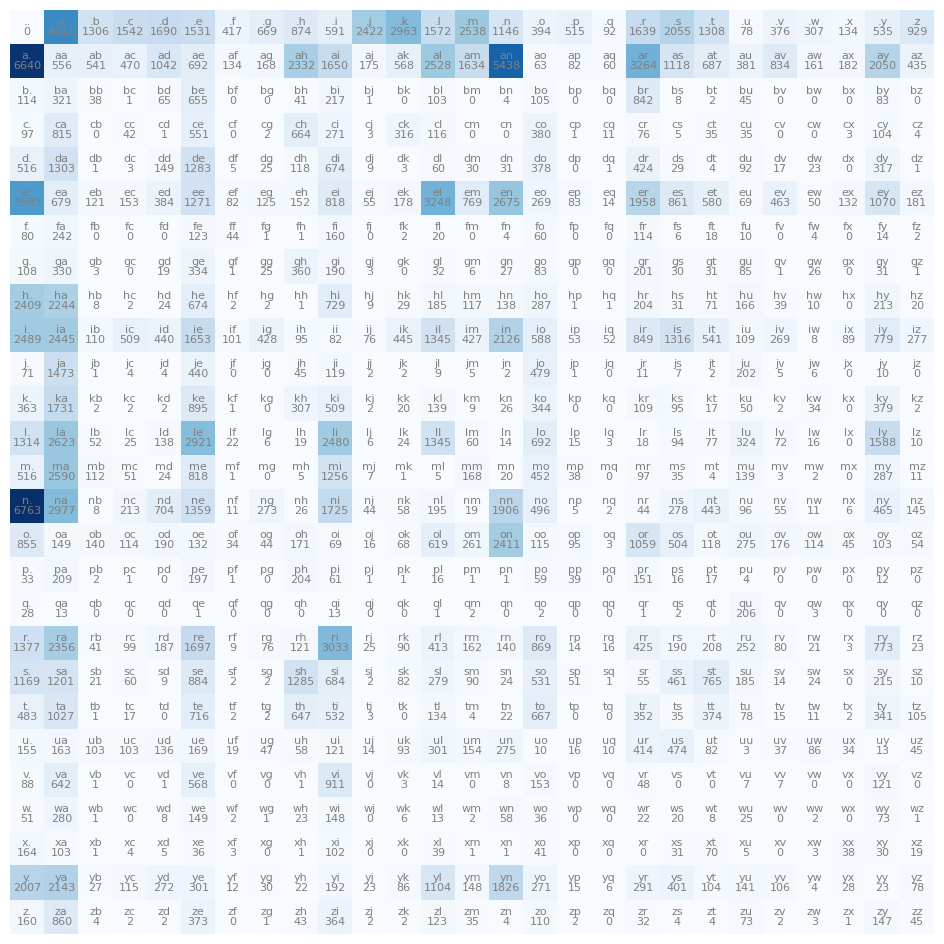

In [146]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
plt.imshow(N, cmap="Blues")
for i in range(27):
    for j in range(27):
        s = indexToChar[i] +  indexToChar[j]
        plt.text(j, i, s, ha="center", va="bottom", color="gray", size=8)
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray", size=8)
plt.axis("off")

In [147]:
generator = torch.Generator().manual_seed(2147483647)
P = N.float() / torch.sum(N, 1, keepdim=True)


for _ in range(100):
    generated_sequence = []
    idx = 0
    while True:
        idx = torch.multinomial(
            P[idx], num_samples=1, replacement=True, generator=generator
        ).item()
        generated_sequence.append(indexToChar[idx])
        if idx == 0:  # Stop if we hit the end token
            break

    print("".join(generated_sequence))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.
ka.
emimmsade.
enkaviyny.
ftlspihinivenvorhlasu.
dsor.
br.
jol.
pen.
aisan.
ja.
feniee.
zem.
deru.
firit.
gaikajahahbevare.
kiysthelenaririenah.
keen.
x.
al.
kal.
thavazeeromysos.
laitenimieegariseriyen.
k.
illeleldole.
meenisammigama.
mmin.
asharin.
alcalar.
jayn.
asaz.
selanely.
chay.
rana.
ai.
yviamisashougen.
l.
beyncaro.
allan.
annutetoradrilia.
rddeman.
me.
vifahevara.
jala.
j.
gh.
cryalan.
rlaylmacondo.
pera.
yd.
en.
aienossin.
me.
jancla.
tiesel.
jedahzynaleroneritotturiron.
cri.
alkismeamere.
morad.
lieinaronamnne.
miayuleonteadajeya.
renari.
x.
keika.
s.
ynn.
miudawa.
chahan.
jondelie.
kedariza.
lha.
denoni.
kar.
kavanista.
kesorrlilaa.
lelike.
ssh.
drl.
rcagalaicalasion.
avallciny.
boh.
en.
caikeladeradefwiea.
fes.
malolela.
liy.
elan.
jalinain.
rmayoadish.
con.
alomaruikeee.


In [148]:
log_likelihood = 0.0
count = 0

for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = charToIndex[ch1]
        idx2 = charToIndex[ch2]
        pb = P[idx1, idx2]
        logPb = torch.log(pb)
        log_likelihood += logPb
        # print(f"{ch1}{ch2} {pb:.4f} {logPb:.4f}")
        count += 1

print(f"Log-likelihood: {log_likelihood:.4f}")
nll = -log_likelihood
print(f"Negative Log-likelihood: {nll:.4f}")
print(f"Avg Negative Log-likelihood: {nll/count:.4f}")

Log-likelihood: -559891.7500
Negative Log-likelihood: 559891.7500
Avg Negative Log-likelihood: 2.4541
